In [4]:
!pip install -r ./requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached datasets-3.2.0-py3-none-any.whl (480 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 KB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# Libraries

In [ ]:
import os
from datasets import Dataset, DatasetDict, Features, Image
import numpy as np
import albumentations as A

/home/yuhaopro/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Preparation
In this step, I will be using the `datasets` python library to load both the image and mask together to make it easier for downstream tasks to process the data.
<br>

Once the dataset can be loaded, image augmentation will be performed with the `albumentations` python library to ensure the image size is consistent and our training data is robust.

## Data Loading

In [15]:
def create_data(split_path):
    images = []
    masks = []
    color_dir = os.path.join(split_path, 'color')
    label_dir = os.path.join(split_path, 'label')
    
    # Sort to ensure the pairing order is consistent
    for fname in sorted(os.listdir(color_dir)):
        image_path = os.path.join(color_dir, fname)
        mask_fname = fname.replace("jpg", "png")
        mask_path = os.path.join(label_dir, mask_fname)
        
        images.append(image_path)
        masks.append(mask_path)
        
    return {"image": images, "mask": masks}


In [16]:
features = Features({
    "image": Image(),
    "mask": Image()
})

train_val_data = create_data("Dataset/TrainVal")
test_data = create_data("Dataset/Test")

train_val_dataset = Dataset.from_dict(train_val_data, features=features)
test_dataset = Dataset.from_dict(test_data, features=features)




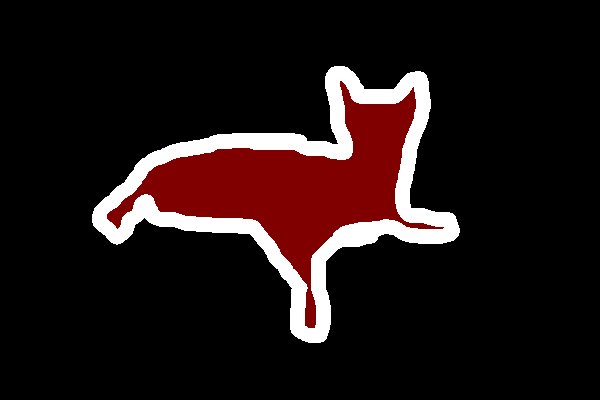

In [17]:
train_val_dataset[0]["mask"]

## Image Augmentations
To prepare for resizing, I will use the smallest width and height image as a baseline for the resized dimensions.

In [ ]:
# extract width and height
def extract_dimensions(data):
    width, height = data["image"].size
    return {"width": width, "height": height}

# find min width and height
dim_dataset = train_val_dataset.map(extract_dimensions)
min_w = min(dim_dataset["width"])
min_h = min(dim_dataset["height"])
print((min_h, min_h)) # (108,108)


Map: 100%|██████████| 3680/3680 [00:22<00:00, 166.93 examples/s]

(108, 108)


In [ ]:

# min_h = 512
# min_w = 512
transform = A.Compose([
    A.Resize(height=min_h, width=min_w),       \
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),               
    A.Rotate(limit=(-40,40)),
    A.ElasticTransform(p=0.5),                   
    A.ColorJitter(p=0.5),                        
], seed=137)


In [ ]:
def apply_transform(data):
    image = np.array(data["image"])
    label = np.array(data["label"])
    

SyntaxError: invalid syntax (1125222177.py, line 2)